In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
random.seed(42)
np.random.seed(4378)

#  A simple greedy k-armed bandit algorithm

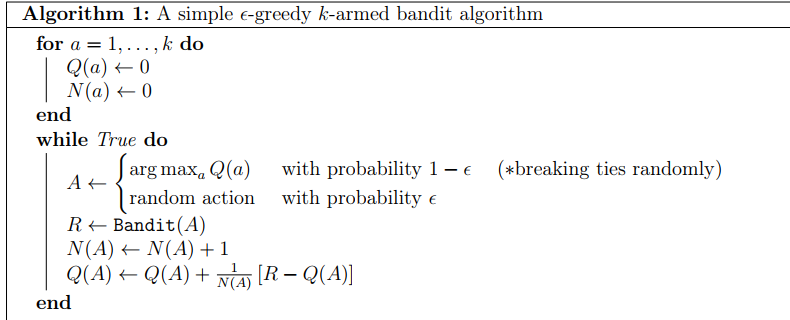

In [ ]:
# define bandit
class Bandit:
    def __init__(self, m):
        self.m = m       # initial action value estimates
        self.mean = 0    # mean estimate
        self.N = 0       # Number of time bandit was selected

    def action(self):
        # bandit action value with some randomness
        return np.random.randn() + self.m     

    def update(self, x):
        # update mean and steps
        self.N += 1
        self.mean = self.mean + (1.0/self.N)*(x-self.mean)


def epilson_greedy(m1, m2, m3, eps, N):

    # define bandits
    bandits = [Bandit(m1), Bandit(m2), Bandit(m3)]
    
    # array to store action value for each bandit
    data = np.empty(N)
  

    for i in range(N):
        # epsilon greedy
        p = np.random.random()

        if p < eps:
             # explore
            j = np.random.choice(3)
        else:
            # exploit
            j = np.argmax([b.mean for b in bandits])
        
        # take action
        x = bandits[j].action()
        bandits[j].update(x)

        # for the plot
        data[i] = x
    cumulative_average = np.cumsum(data) / (np.arange(N) + 1)

    # plot moving average 
    plt.plot(cumulative_average,label='Average')
    plt.plot(np.ones(N)*m1,label="Bandit 1")
    plt.plot(np.ones(N)*m2,label="Bandit 2")
    plt.plot(np.ones(N)*m3,label = "Bandit 3")
    plt.xscale('log')
    plt.legend()
    plt.show()

    return cumulative_average

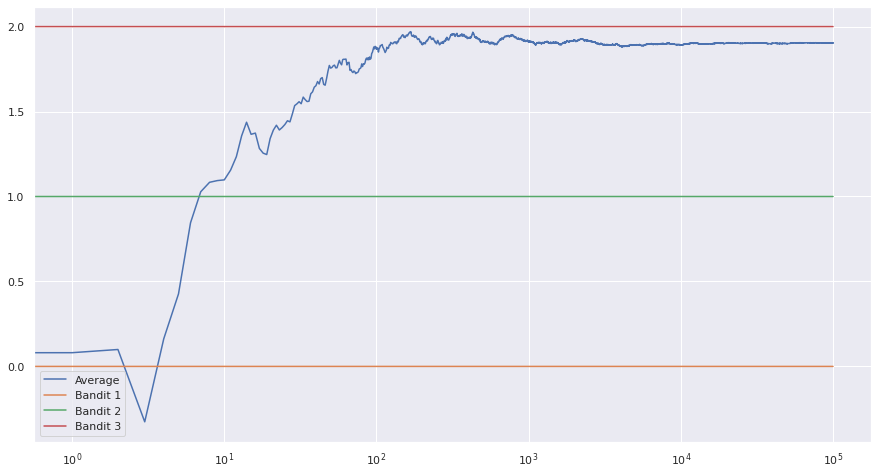

In [ ]:
plt.figure(figsize=(15,8))
run_1 = epilson_greedy(0, 1, 2, 0.1, 100000)

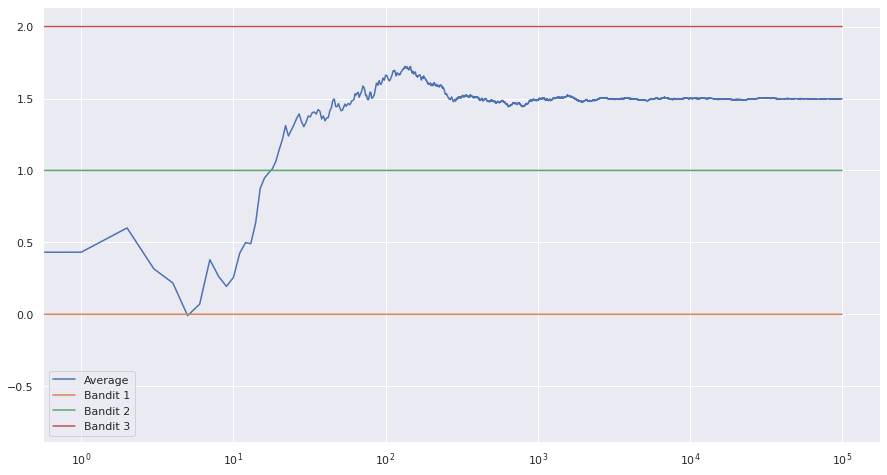

In [ ]:
plt.figure(figsize=(15,8))
run_2 = epilson_greedy(0, 1, 2, 0.5, 100000)

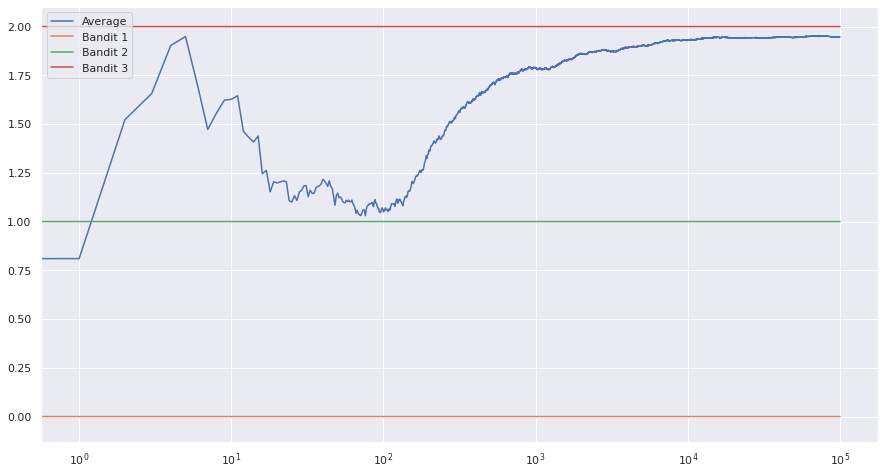

In [ ]:
plt.figure(figsize=(15,8))
run_3 = epilson_greedy(0, 1, 2, 0.05, 100000)

In [ ]:
# define bandit
class BanditUpperLimit:
    def __init__(self, m, uppler_limit):
        self.m = m                  # initial action value estimates
        self.mean = uppler_limit    # mean estimate is upper limit
        self.N = 0                   # Number of time bandit was selected

    def action(self):
        # bandit action value with some randomness
        return np.random.randn() + self.m     

    def update(self, x):
        # update mean and steps
        self.N += 1
        self.mean = self.mean + (1.0/self.N)*(x-self.mean)


def uppler_limit(m1, m2, m3,N,uppler_limt=5):

    # define bandits
    bandits = [BanditUpperLimit(m1,uppler_limt), 
               BanditUpperLimit(m2,uppler_limt), 
               BanditUpperLimit(m3,uppler_limt)
               ]
    
    # array to store action value for each bandit
    data = np.empty(N)
  

    for i in range(N):
        
        # select bandit basis optimistic intial values 
        j = np.argmax([b.mean for b in bandits])
        
        # take action
        x = bandits[j].action()
        bandits[j].update(x)

        # for the plot
        data[i] = x
    
    cumulative_average = np.cumsum(data) / (np.arange(N) + 1)

    # plot moving average 
    plt.plot(cumulative_average,label='Average')
    plt.plot(np.ones(N)*m1,label="Bandit 1")
    plt.plot(np.ones(N)*m2,label="Bandit 2")
    plt.plot(np.ones(N)*m3,label = "Bandit 3")
    plt.xscale('log')
    plt.legend()
    plt.show()

    return cumulative_average

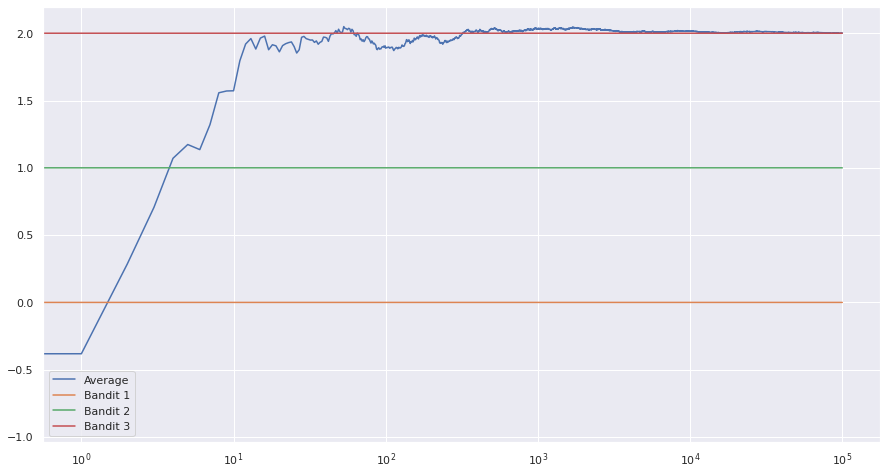

In [ ]:
plt.figure(figsize=(15,8))
run_4 = uppler_limit(0, 1, 2,100000)

In [ ]:
# define bandit
class BanditUpperConfidence:
    def __init__(self, m,):
        self.m = m       # initial action value estimates
        self.mean = 0    # mean estimate is upper limit
        self.N = 0       # Number of time bandit was selected

    def action(self):
        # bandit action value with some randomness
        return np.random.randn() + self.m     

    def update(self, x):
        # update mean and steps
        self.N += 1
        self.mean = self.mean + (1.0/self.N)*(x-self.mean)


def get_confidence(mean,total_play, step,c):
    return mean + c*np.sqrt(np.log(total_play)/step)



def uppler_confidence(m1, m2, m3,N,c=0.1):

    # define bandits
    bandits = [BanditUpperConfidence(m1), 
               BanditUpperConfidence(m2), 
               BanditUpperConfidence(m3)
               ]
    
    # array to store action value for each bandit
    data = np.empty(N)
    total_plays = 0

    # initialization: play each bandit once to avoid dividing by 0 in get confidence func
    for j in range(len(bandits)):
        x = bandits[j].action()
        total_plays += 1
        bandits[j].update(x)
  

    for i in range(N):
        
        # select bandit basis optimistic intial values 
        j = np.argmax([get_confidence(b.mean, total_plays, b.N,c) for b in bandits])
        
        # take action
        x = bandits[j].action()
        bandits[j].update(x)

        # for the plot
        data[i] = x
    
    cumulative_average = np.cumsum(data) / (np.arange(N) + 1)

    # plot moving average 
    plt.plot(cumulative_average,label='Average')
    plt.plot(np.ones(N)*m1,label="Bandit 1")
    plt.plot(np.ones(N)*m2,label="Bandit 2")
    plt.plot(np.ones(N)*m3,label = "Bandit 3")
    plt.xscale('log')
    plt.legend()
    plt.show()

    return cumulative_average

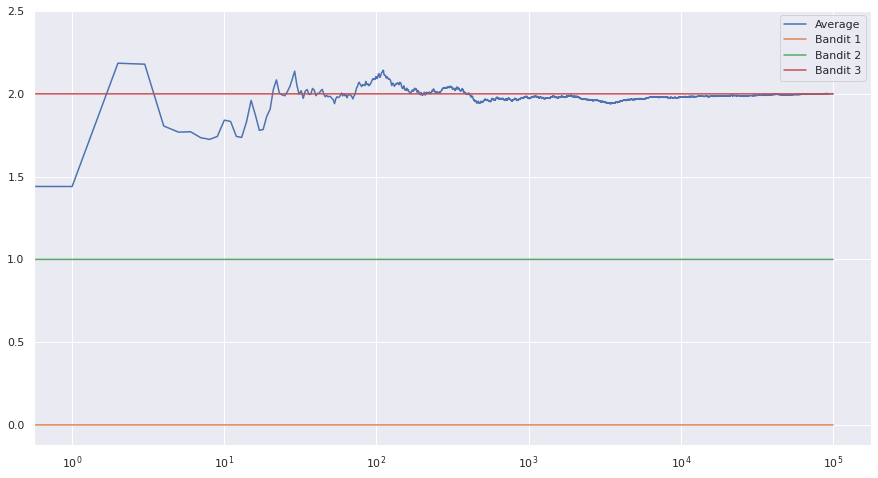

In [ ]:
plt.figure(figsize=(15,8))
run_5 = uppler_confidence(0, 1, 2,100000)

In [ ]:
class BayesianBandit:
    def __init__(self, true_mean):
        self.true_mean = true_mean
        # parameters for mu - prior is N(0,1)
        self.predicted_mean = 0
        self.lambda_ = 1
        self.sum_x = 0 # for convenience
        self.tau = 1

    def action(self):
        return np.random.randn() + self.true_mean

    def sample(self):
        return np.random.randn() / np.sqrt(self.lambda_) + self.predicted_mean

    def update(self, x):
        self.lambda_ += self.tau
        self.sum_x += x
        self.predicted_mean = self.tau*self.sum_x / self.lambda_

def thompson_sampling(m1, m2, m3, N):
    bandits = [BayesianBandit(m1), BayesianBandit(m2), BayesianBandit(m3)]

    data = np.empty(N)
    
    for i in range(N):
        # optimistic initial values
        j = np.argmax([b.sample() for b in bandits])
        x = bandits[j].action()
        bandits[j].update(x)

        # for the plot
        data[i] = x
    cumulative_average = np.cumsum(data) / (np.arange(N) + 1)

    # plot moving average 
    plt.plot(cumulative_average,label='Average')
    plt.plot(np.ones(N)*m1,label="Bandit 1")
    plt.plot(np.ones(N)*m2,label="Bandit 2")
    plt.plot(np.ones(N)*m3,label = "Bandit 3")
    plt.xscale('log')
    plt.legend()
    plt.show()

    return cumulative_average

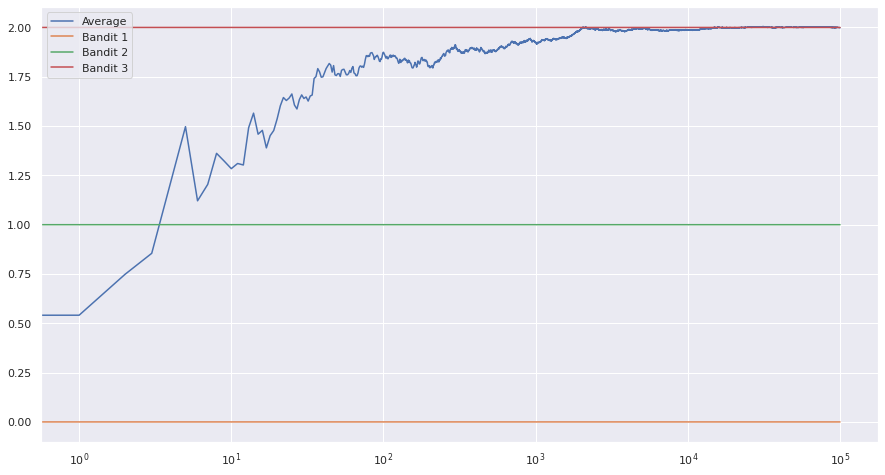

In [ ]:
plt.figure(figsize=(15,8))
run_6 = thompson_sampling(0, 1, 2,100000)

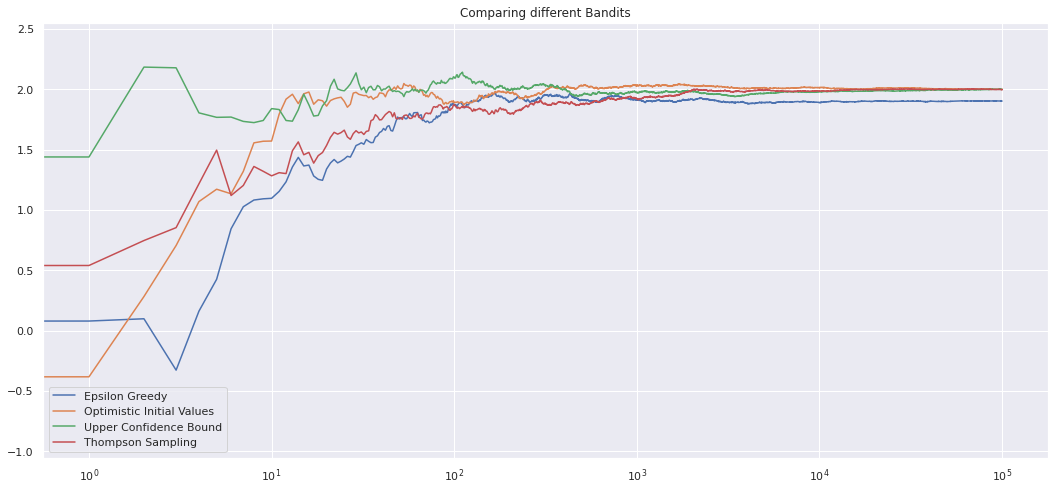

In [ ]:
# plot moving average 
plt.figure(figsize=(18,8))
plt.plot(run_1,label='Epsilon Greedy')
plt.plot(run_4,label="Optimistic Initial Values")
plt.plot(run_5,label="Upper Confidence Bound")
plt.plot(run_6,label="Thompson Sampling")
plt.xscale('log')
plt.legend()
plt.title("Comparing different Bandits")
plt.show()